Keval Shah


60009220061


IPCV Lab9

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

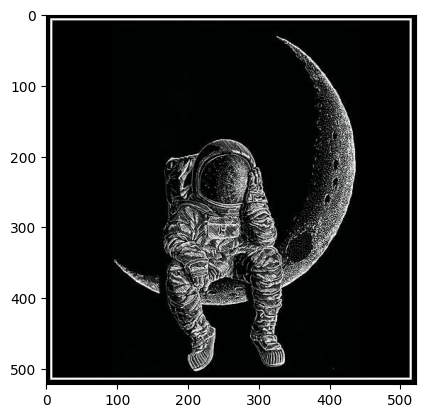

In [24]:
g = cv2.imread('/content/astronaut.jpg', 1)
plt.imshow(g)

In [25]:
g.shape

(522, 522, 3)

In [26]:
image = cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)

In [27]:
image.shape

(522, 522)

In [28]:
def plot_images(original, filtered, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

In [29]:
import random

In [30]:
def region_growing(img, thresh):
    r, c = img.shape
    seed = (random.randint(0, r - 1), random.randint(0, c - 1))

    seg = np.zeros_like(img, dtype=np.uint8)
    seed_x, seed_y = seed
    seg[seed_x, seed_y] = 255
    region_mean = img[seed_x, seed_y]

    growing = True
    pixels = [(seed_x, seed_y)]

    while growing:
        new_pixels = []
        for x, y in pixels:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                nx, ny = x + dx, y + dy

                if 0 <= nx < r and 0 <= ny < c and seg[nx, ny] == 0:
                    if abs(int(img[nx, ny]) - region_mean) < thresh:
                        seg[nx, ny] = 255
                        new_pixels.append((nx, ny))

        if new_pixels:
            region_mean = np.mean([img[x, y] for x, y in new_pixels])
            pixels = new_pixels
        else:
            growing = False

    return seg

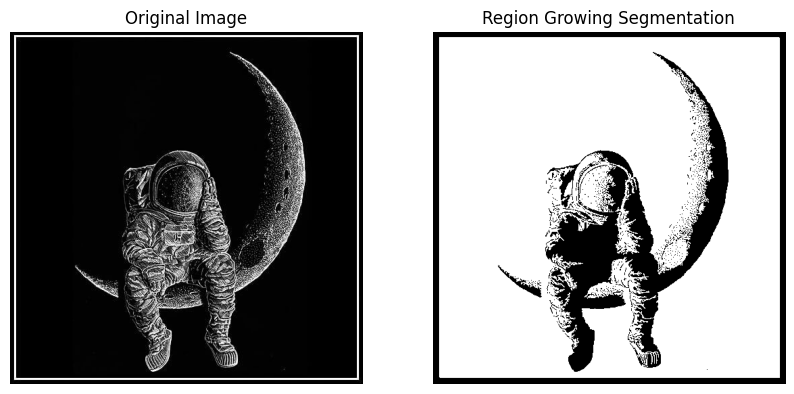

In [31]:
result = region_growing(image,60)
plot_images(image, result, 'Region Growing Segmentation')

In [32]:
def merge_regions(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False

            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break

            if not was_merged:
                new_regions.append(current)

        regions = new_regions
        if not merged:
            break
    return regions

In [33]:
def split_and_merge(image, num_regions):
    r, c = image.shape
    step = r // num_regions

    regions = [np.arange(i, min(i + step, r)) for i in range(0, r, step)]
    regions = merge_regions(regions)

    output_image = np.zeros_like(image, dtype=np.uint8)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :]) - image[row, :]) < 10) * 255

    return output_image

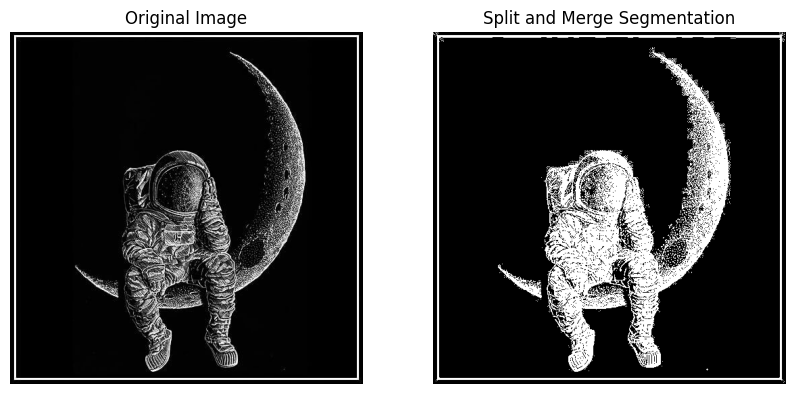

In [36]:
s = split_and_merge(image, 2)
plot_images(image, s, 'Split and Merge Segmentation')

#### Coloured Image

In [58]:
image_path = '/content/pride.jpg'

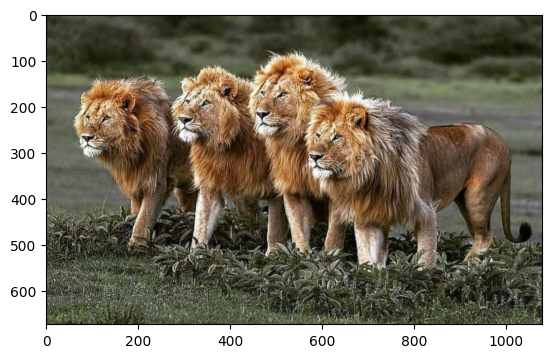

In [59]:
h = cv2.imread(image_path, 1)
k = cv2.cvtColor(h, cv2.COLOR_BGR2RGB)
plt.imshow(k)

In [43]:
k.shape

(674, 1080, 3)

In [44]:
def region_growing_color(img, thresh):
    r, c, s = img.shape
    seed = (random.randint(0, r - 1), random.randint(0, c - 1))

    seg = np.zeros_like(img, dtype=np.uint8)
    seed_x, seed_y = seed
    seg[seed_x, seed_y] = [255, 255, 255]
    region_mean = img[seed_x, seed_y]
    growing = True
    pixels = [(seed_x, seed_y)]

    while growing:
        new_pixels = []
        for x, y in pixels:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                nx, ny = x + dx, y + dy

                if 0 <= nx < r and 0 <= ny < c and np.all(seg[nx, ny] == 0):
                    if np.linalg.norm(img[nx, ny] - region_mean) < thresh:
                        seg[nx, ny] = [255, 255, 255]
                        new_pixels.append((nx, ny))

        if new_pixels:
            region_mean = np.mean([img[x, y] for x, y in new_pixels], axis=0)
            pixels = new_pixels
        else:
            growing = False

    return seg

In [55]:
def display_images(original_path, filtered, title_filtered):
    original = cv2.imread(original_path, 1)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered)
    plt.title(title_filtered)
    plt.show()

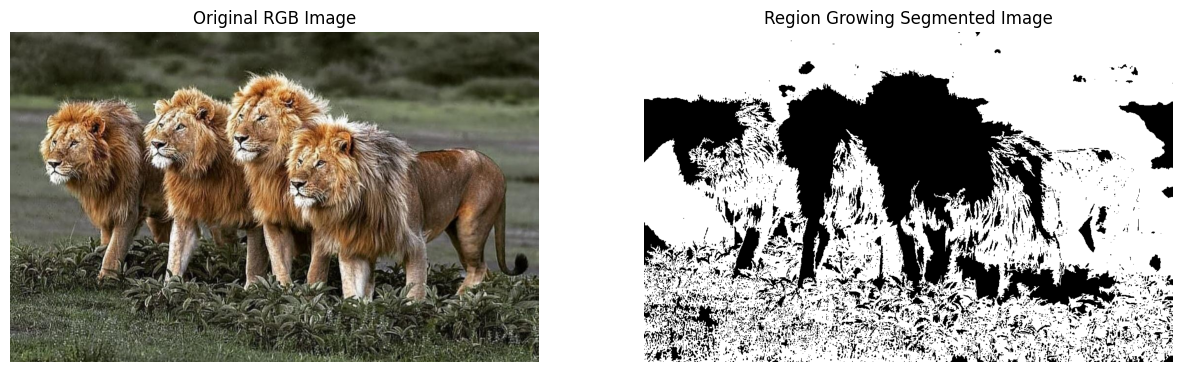

In [84]:
result = region_growing_color(k,60)

split_merged_image = cv2.merge((result, result, result))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(k)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Region Growing Segmented Image')
plt.axis('off')

plt.show()

In [74]:
def merge_regions_color(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False

            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break

            if not was_merged:
                new_regions.append(current)

        regions = new_regions
        if not merged:
            break
    return regions

In [75]:
def split_and_merge_color(image, num_regions):
    r, c, s = image.shape
    step = r // num_regions

    regions = [np.arange(i, min(i + step, r)) for i in range(0, r, step)]
    regions = merge_regions_color(regions)

    output_image = np.zeros_like(image, dtype=np.uint8)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :], axis=0) - image[row, :]) < 10).astype(np.uint8) * 255

    return output_image

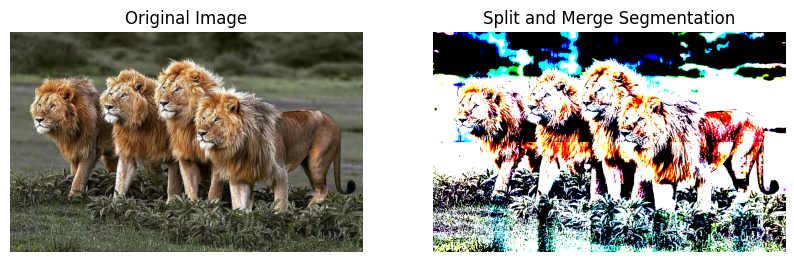

In [76]:
split_merged_image_color = split_and_merge_color(k, 2)
plot_images(k, split_merged_image_color, 'Split and Merge Segmentation')

### Conclusion

In this experiment, we implemented region growing segmentation to effectively isolate distinct regions within images. By utilizing a seed pixel and evaluating neighboring pixels based on a defined threshold, we demonstrated how region growing can adaptively segment images based on color similarity. This technique showcases the importance of pixel connectivity and region homogeneity in image analysis.



### Applications
  
- **Object Recognition**:
  - Enhancing object detection algorithms by isolating specific objects from the background in images or video feeds.

- **Autonomous Vehicles**:
  - Assisting in the identification of road signs, lane markings, and obstacles by segmenting relevant regions from the surroundings.

- **Image Editing**:
  - Enabling advanced editing techniques by allowing users to isolate and manipulate specific parts of an image seamlessly.

- **Agriculture**:
  - Monitoring crop health by analyzing images of fields, identifying areas of interest, and assessing plant growth.

- **Robotics**:
  - Assisting robots in navigation and object manipulation by segmenting visual inputs for better environmental understanding.
